# Project 1- commercial domestic (USA) airline flights

Group members:
Maayan Raviv,
Dean Pienica

In [5]:
#importing the dataset
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'

dataset = pd.read_csv(filename)

dataset.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


The question that we decided to conduct for this data set are:
1-What day is the most popular for departing?
2-Which month is the most popular for departing?
3-In what year are most flights depart? 
4-Which destination is the most popular?
5- What is the most popular reason for cancellation

Those question are concerned to the marketing team that promote flights campigns, the marketing team concern is to undedrstand what campigns they should create to promote more directly to customer needs and increase their revenue. 
The first question concern to each day would imply what is the most popular day that customer preferd to depart, it will allow the team to make more efforts with flights that leave in those days and to price those flights accordingly.
Same for the second question that will show which months are more popular. 
The third questions is more concerned for learning so it will be easier to suggest in what year were campigns more succesful, to review thhose campigns and get insights that would be implmented for this year.
The fourth question is for marketing needs as well it will enable them to understand what locations seem to bo more attractive and to investigate why and also to think how to market better other destinations.
The last question is to make sure if there are any comapny that tend to cancel more flights not becuase uncontrol causes as weather, but because of reasone that they have control on. The marketing team can decide not to promote those company the same way as those with tendancy to cancel less. Also, they can inform those companies that they need to improve their services. 

# 1-What day is the most popular for departing?
The most popular day is Sunday, Where most flight are from IAH airport- Houston Bush Airport. 

In [6]:
dataset_copy = dataset[['Origin', 'DayOfWeek', 'Year']].copy()
dataset_copy = dataset_copy.groupby(['Origin', 'DayOfWeek'], as_index=False)['Year'].count()
dataset_copy = dataset_copy.rename(columns={'Year': 'Count'})

hou_data = dataset_copy[dataset_copy['Origin']=='HOU']
hou_data = hou_data.sort_values(by=['DayOfWeek'], ascending=False)
iah_data = dataset_copy[dataset_copy['Origin']=='IAH']
iah_data = iah_data.sort_values(by=['DayOfWeek'], ascending=False)
hou_data

,Origin,DayOfWeek,Count
6,HOU,7,665
5,HOU,6,505
4,HOU,5,601
3,HOU,4,593
2,HOU,3,595
1,HOU,2,606
0,HOU,1,754


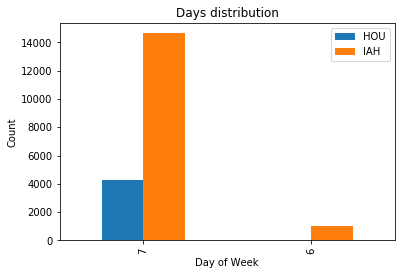

In [19]:
# Let's plot a bar graph
data = np.array(list(zip(hou_data['Count'], iah_data['Count'])))
data = pd.DataFrame(data, columns=['HOU', 'IAH'])
axes = data.plot.bar(title='Days distribution')
axes.set(xlabel="Day of Week", ylabel="Count")
axes.set_xticklabels(['7', '6', '5', '4', '3', '2', '1'])
plt.show()

# 2- Which month is the most popular for departing? 

The Data is available only for two months, we decided to present the distribution between the airports as well.
The most popular month (from the data avilable) is January and most flights depart from IAH airport.

In [7]:
dataset_copy = dataset.copy()
# dataset_copy.head(20)
dataset_copy = dataset_copy.groupby(['Origin', 'Month'], as_index=False)['Year'].count()
dataset_copy = dataset_copy.rename(columns={'Year': 'Count'})

hou_data = dataset_copy[dataset_copy['Origin']=='HOU']
iah_data = dataset_copy[dataset_copy['Origin']=='IAH']
hou_data 
iah_data

,Origin,Month,Count
2,IAH,1,14640
3,IAH,2,1041


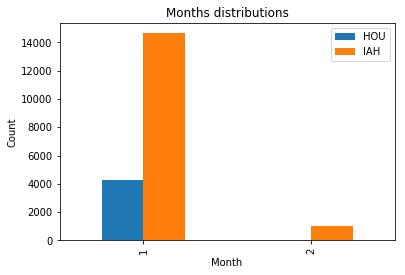

In [20]:
# Let's plot a bar graph for Q1
data = np.array(list(zip(hou_data['Count'], iah_data['Count'])))
data = pd.DataFrame(data, columns=['HOU', 'IAH'])
axes = data.plot.bar(title='Months distributions')
axes.set(xlabel="Month", ylabel="Count")
axes.set_xticklabels(list(hou_data['Month']))
plt.show()

# 3- In what year are most flights depart? 
Data is  avilable only for 2011

In [8]:
dataset_copy = dataset.copy()
# dataset_copy.head(20)
dataset_copy = dataset_copy.groupby(['Year'], as_index=False)['Origin'].count()
dataset_copy = dataset_copy.rename(columns={'Origin': 'Count'})
dataset_copy 

,Year,Count
0,2011,20000


# 4- Which destination is the most popular?
The most popular detination is DAL with 884 flights.
The destination with minimum flights is RNO with 4 flights. 
The mean for each destination is 188.


In [9]:
dataset_copy = dataset[['Dest', 'Origin']].copy()
dataset_copy = dataset_copy.groupby(['Dest'], as_index=False)['Origin'].count()
dataset_copy = dataset_copy.rename(columns={'Origin': 'Count'})
dataset_copy = dataset_copy.sort_values(by=['Count'], ascending=False)
top_10_dest = dataset_copy[:10]

In [17]:
min_count = min(dataset_copy['Count'])
min_record = dataset_copy[dataset_copy['Count']==min_count]
min_dest = list(min_record['Dest'])[0]
print("Dest with minimum number of flights:", min_dest, min_count)

max_count = max(dataset_copy['Count'])
max_record = dataset_copy[dataset_copy['Count']==max_count]
max_dest = list(max_record['Dest'])[0]
print("Dest with maximum number of flights:", max_dest, max_count)


Dest with minimum number of flights: RNO 4
Dest with maximum number of flights: DAL 884


In [16]:
dataset_copy = dataset.copy()
# dataset_copy.head(20)
dataset_copy = dataset_copy.groupby(['Dest'], as_index=False)['Origin'].count()
dataset_copy = dataset_copy.rename(columns={'Origin': 'Count'})
dataset_copy.describe() 

,Count
count,106.000000
mean,188.679245
std,161.497961
min,4.000000
25%,64.250000
50%,147.500000
75%,251.250000
max,884.000000


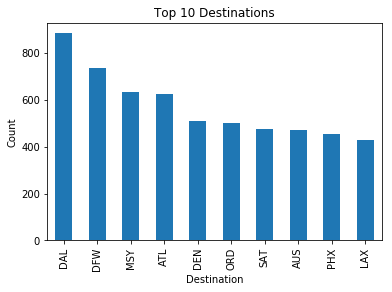

In [21]:
#Let's plot a bar graph
data = np.array(list(top_10_dest['Count']))
data = pd.DataFrame(data)
axes = data.plot.bar(title='Top 10 Destinations')
axes.get_legend().remove()
axes.set(xlabel="Destination", ylabel="Count")
axes.set_xticklabels(top_10_dest['Dest'])
plt.show()

# 5- What is the most popular reason for cancellation
The most common reason for cancelation is weather among those that are recorded. However, most records doesn't include a documnation for the reason of cancelation (19776 records). 

In [23]:
def filter_func(x):
    x = str(x)
    if x=='A':
        return "carrier"
    elif x=='B':
        return "weather"
    elif x=='C':
        return "national air system"
    elif x=='D':
        return "security"
    elif x=="E":
        return "undefined"
    
dataset_copy = dataset[['CancellationCode', 'Cancelled']].copy()
dataset_copy['CancellationCode'] = dataset_copy['CancellationCode'].fillna('E')
dataset_copy = dataset_copy.groupby(['CancellationCode'], as_index=False)['Cancelled'].count()
dataset_copy = dataset_copy.rename(columns={'Cancelled': 'Count'})
dataset_copy['Reason'] = dataset_copy['CancellationCode'].apply(lambda x: filter_func(x))
dataset_copy = dataset_copy.sort_values(by=['CancellationCode'], ascending=False)
dataset_copy

,CancellationCode,Count,Reason
3,E,19776,undefined
2,C,5,national air system
1,B,162,weather
0,A,57,carrier


Among those that were documented the main reason as appear in the bar chart bellow is weather. 

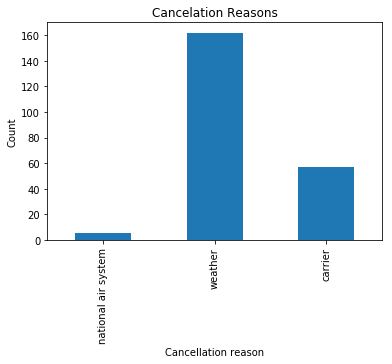

In [24]:
# lets draw the bar graph
dataset_copy = dataset_copy[dataset_copy['CancellationCode']!='E']
data = np.array(list(dataset_copy['Count']))
data = pd.DataFrame(data)
axes = data.plot.bar(title='Cancelation Reasons')
axes.get_legend().remove()
axes.set(xlabel="Cancellation reason", ylabel="Count")
axes.set_xticklabels(dataset_copy['Reason'])
plt.show()


Summary-
1-IAH consider to be a bigger airport with a bigger capacity, therefore the fact that more flights leave from this airport is not nesscarly represent that customer prefer this airport comparing to HOU.
2-There are more holidays in January with days off, which might effect the number of flights that will depart in January.
3-The dataset is not limited and representitve and it's hard to get final conculsions and insights based on this data only. 
